# Kenali Sapinya
Anda memiliki 2 jenis gambar yaitu sapi tanpa background dan sapi dengan background.
Buatlah model pola sapi dengan gambar tanpa background. Kemudian gunakan pola tersebut untuk mendeteksi sapi dengan background. Gunakan interpolasi dan finite difference atau metode lain di dalam materi metode numerik.

Note:
1. Tidak boleh menggunakan library kecuali untuk membaca image
2. Algoritma Anda rancang sendiri dan implementasikan sendiri from scratch
3. Satu kelompok terdiri dari 4 orang.

In [2]:
import cv2
import matplotlib.pyplot as plt

## Menampilkan Gambar

In [3]:
def display_im(im1, im2, im3, title):
  f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
  ax1.imshow(im1, cmap='gray')
  ax1.set_title('Sapi 1')
  ax2.imshow(im2, cmap='gray')
  ax2.set_title('Sapi 2')
  ax3.imshow(im3, cmap='gray')
  ax3.set_title('Sapi 3')
  f.suptitle(title, fontsize=15)

def display_im2(im1, im2, title):
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.imshow(im1, cmap='gray')
  ax1.set_title('Sapi 1')
  ax2.imshow(im2, cmap='gray')
  ax2.set_title('Sapi 2')
  f.suptitle(title, fontsize=15)

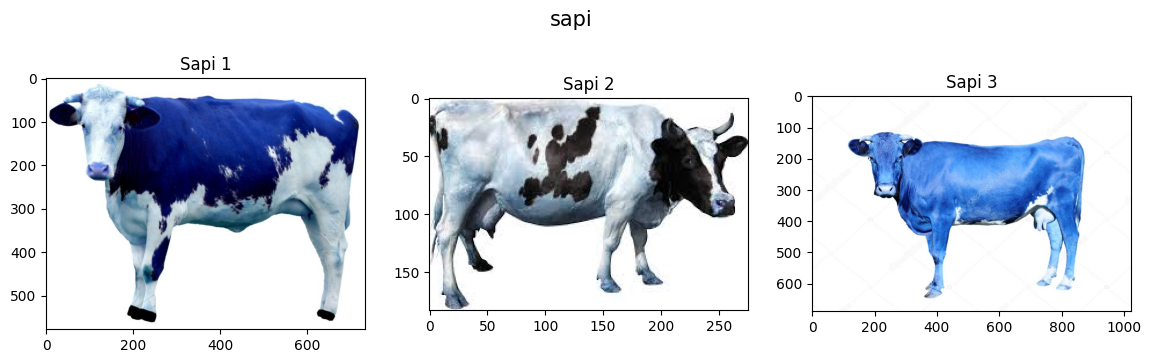

In [4]:
sapi_tanpa_bg1 = cv2.imread('./sapi1.jpg')
sapi_tanpa_bg2 = cv2.imread('./sapi2.jpeg')
sapi_tanpa_bg3 = cv2.imread('./sapi3.jpg')
display_im(sapi_tanpa_bg1,sapi_tanpa_bg2,sapi_tanpa_bg3, title='sapi')

In [5]:
image1 = sapi_tanpa_bg1
image2 = sapi_tanpa_bg2
image3 = sapi_tanpa_bg3

## Resize Image

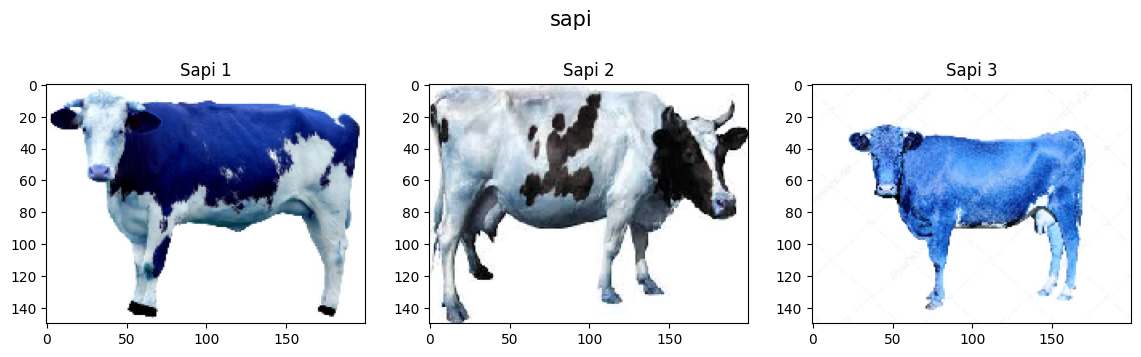

In [21]:
def get_shape(image):
    height = len(image)
    width = len(image[0])
    return height, width

def resize_image(image, new_width, new_height):
    height, width = get_shape(image)

    scale_x = width / new_width
    scale_y = height / new_height

    resized_image = [[0] * new_width for _ in range(new_height)]

    for y in range(new_height):
        for x in range(new_width):
            src_x = int(x * scale_x)
            src_y = int(y * scale_y)

            x1 = src_x
            x2 = min(x1 + 1, width - 1)
            y1 = src_y
            y2 = min(y1 + 1, height - 1)

            weight_x = src_x - x1
            weight_y = src_y - y1

            top_left = image[y1][x1]
            top_right = image[y1][x2]
            bottom_left = image[y2][x1]
            bottom_right = image[y2][x2]

            interpolated_pixel = [
                int((1 - weight_x) * (1 - weight_y) * top_left[0] +
                    weight_x * (1 - weight_y) * top_right[0] +
                    (1 - weight_x) * weight_y * bottom_left[0] +
                    weight_x * weight_y * bottom_right[0]),
                int((1 - weight_x) * (1 - weight_y) * top_left[1] +
                    weight_x * (1 - weight_y) * top_right[1] +
                    (1 - weight_x) * weight_y * bottom_left[1] +
                    weight_x * weight_y * bottom_right[1]),
                int((1 - weight_x) * (1 - weight_y) * top_left[2] +
                    weight_x * (1 - weight_y) * top_right[2] +
                    (1 - weight_x) * weight_y * bottom_left[2] +
                    weight_x * weight_y * bottom_right[2])
            ]

            resized_image[y][x] = interpolated_pixel

    return resized_image

new_width = 200
new_height = 150

resized_image1 = resize_image(image1, new_width, new_height)
resized_image2 = resize_image(image2, new_width, new_height)
resized_image3 = resize_image(image3, new_width, new_height)

display_im(resized_image1,resized_image2,resized_image3, title='sapi')

## Gaussian Blur

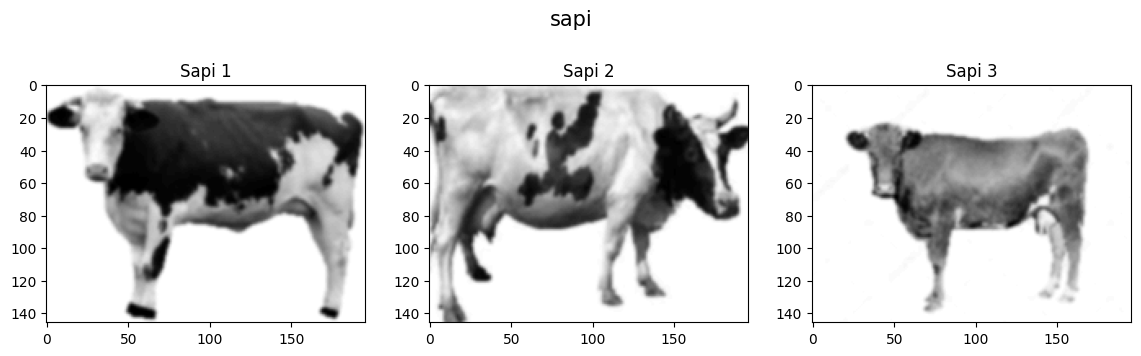

In [22]:
def gaussian_blur(image, kernel_size, sigma):
    # Convert the image to grayscale
    gray_image = []
    for row in image:
        gray_row = []
        for pixel in row:
            gray_value = int(pixel[0] * 0.299 + pixel[1] * 0.587 + pixel[2] * 0.114)
            gray_row.append(gray_value)
        gray_image.append(gray_row)

    # Apply Gaussian blur for noise reduction
    blurred_image = []
    padding = kernel_size // 2

    for i in range(padding, len(gray_image) - padding):
        blurred_row = []
        for j in range(padding, len(gray_image[i]) - padding):
            pixel_value = 0
            for x in range(-padding, padding + 1):
                for y in range(-padding, padding + 1):
                    exponent = -0.5 * ((x**2 + y**2) / (sigma**2))
                    factor = 1.0  # Set factor to 1 as an alternative to using exp function
                    for _ in range(int(abs(exponent) * 100)):  # Manual approximation of exponentiation
                        factor *= 0.99  # Adjust the factor value for more accurate approximation
                    pixel_value += gray_image[i + x][j + y] * factor

            blurred_row.append(pixel_value // (kernel_size**2))
        blurred_image.append(blurred_row)

    return blurred_image

blurred_image1 = gaussian_blur(resized_image1, kernel_size=5, sigma=1)
blurred_image2 = gaussian_blur(resized_image2, kernel_size=5, sigma=1)
blurred_image3 = gaussian_blur(resized_image3, kernel_size=5, sigma=1)

display_im(blurred_image1, blurred_image2, blurred_image3, title='sapi')

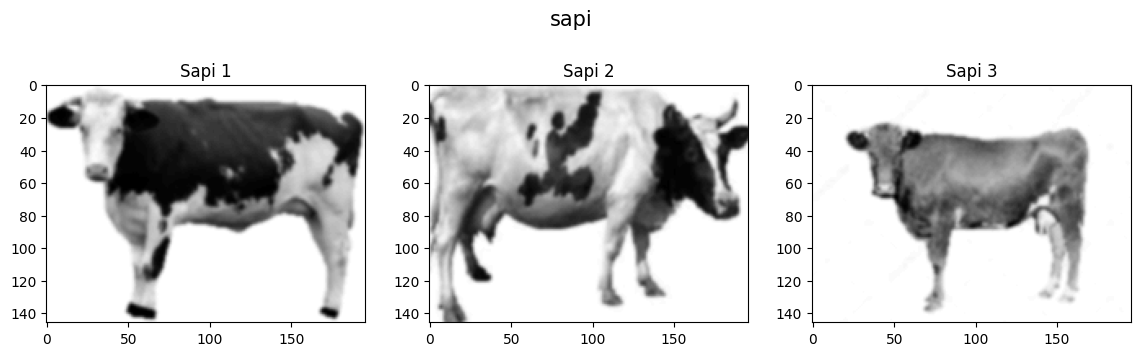

In [23]:
def normalized(image):
    max_value = max(max(image))
    min_value = min(min(image))
    normalized_image = []
    for row in image:
        normalized_row = []
        for pixel_value in row:
            normalized_value = int(255 * (pixel_value - min_value) / (max_value - min_value))
            normalized_row.append(normalized_value)
        normalized_image.append(normalized_row)

    return normalized_image


normalized_image1 = normalized(blurred_image1)
normalized_image2 = normalized(blurred_image2)
normalized_image3 = normalized(blurred_image3)

display_im(normalized_image1, normalized_image2, normalized_image3, title='sapi')

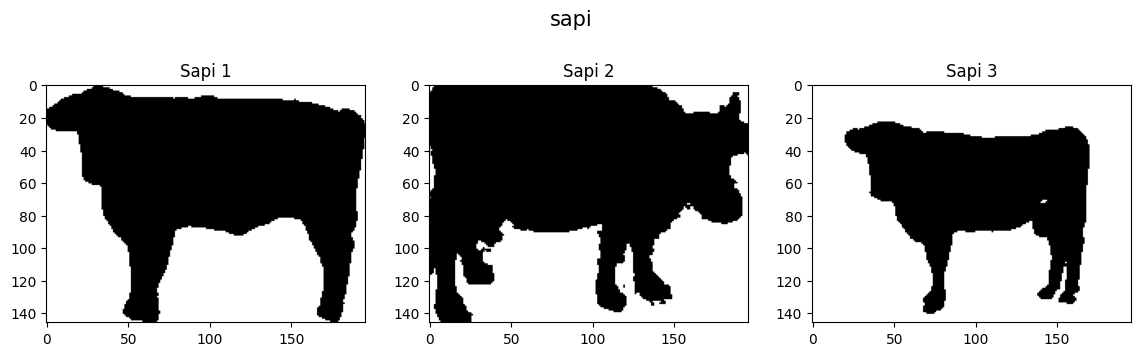

In [24]:
def segmentation(image, threshold):
    segmented_image = []
    for row in image:
        segmented_row = []
        for pixel_value in row:
            if pixel_value >= threshold:
                segmented_row.append(1)  # Object
            else:
                segmented_row.append(0)  # Background
        segmented_image.append(segmented_row)

    return segmented_image

segmented_image1 = segmentation(normalized_image1, 252)
segmented_image2 = segmentation(normalized_image2, 250.5)
segmented_image3 = segmentation(normalized_image3, 245)

display_im(segmented_image1, segmented_image2, segmented_image3, title='sapi')

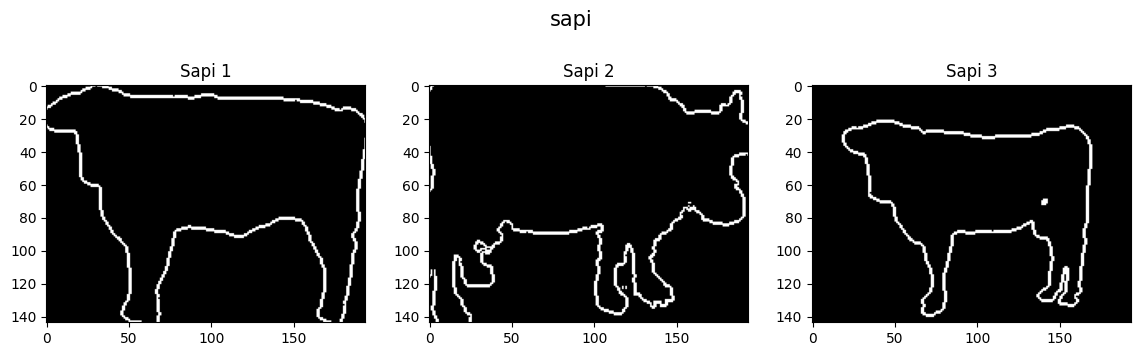

In [26]:
# Perform Sobel filtering for edge detection
def canny_edges_detection(image):
    gradient_x = []
    gradient_y = []
    sobel_threshold = 2.9 #
    # Adjust the threshold value as needed

    for i in range(1, len(image) - 1):
        gradient_row_x = []
        gradient_row_y = []
        for j in range(1, len(image[i]) - 1):
            gx = (image[i + 1][j - 1] + 2 * image[i + 1][j] + image[i + 1][j + 1]) - \
                (image[i - 1][j - 1] + 2 * image[i - 1][j] + image[i - 1][j + 1])
            gy = (image[i - 1][j + 1] + 2 * image[i][j + 1] + image[i + 1][j + 1]) - \
                (image[i - 1][j - 1] + 2 * image[i][j - 1] + image[i + 1][j - 1])
            gradient_row_x.append(gx)
            gradient_row_y.append(gy)
        gradient_x.append(gradient_row_x)
        gradient_y.append(gradient_row_y)

    # Calculate edge magnitude
    edge_magnitude = []
    for i in range(len(gradient_x)):
        magnitude_row = []
        for j in range(len(gradient_x[i])):
            magnitude = (gradient_x[i][j]**2 + gradient_y[i][j]**2) ** 0.5
            magnitude_row.append(magnitude)
        edge_magnitude.append(magnitude_row)

    # Apply thresholding to extract strong edges
    canny_edges = []
    for i in range(len(edge_magnitude)):
        edges_row = []
        for j in range(len(edge_magnitude[i])):
            if edge_magnitude[i][j] >= sobel_threshold:
                edges_row.append(255)
            else:
                edges_row.append(0)
        canny_edges.append(edges_row)

    return canny_edges

# Display the edges
canny_edges1 = canny_edges_detection(segmented_image1)
canny_edges2 = canny_edges_detection(segmented_image2)
canny_edges3 = canny_edges_detection(segmented_image3)

display_im(canny_edges1, canny_edges2, canny_edges3, title='sapi')

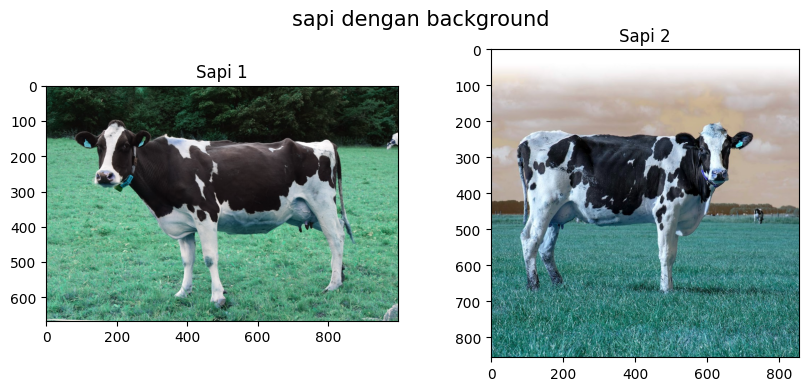

In [27]:
image4 = cv2.imread('./sapi_x.jpeg')
image5 = cv2.imread('./sapiy.jpg')

display_im2(image4, image5, title='sapi dengan background')

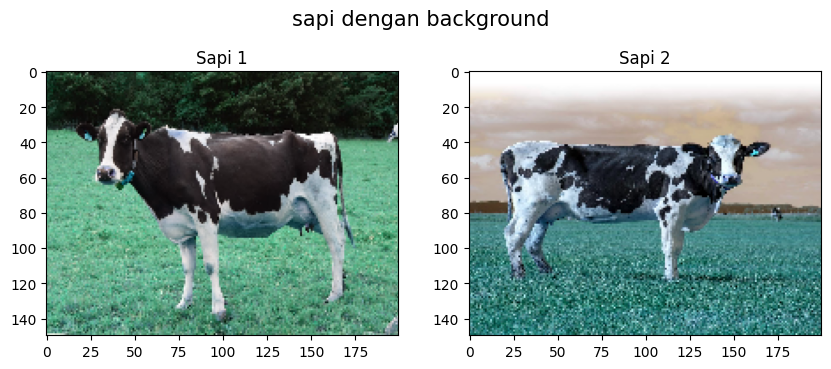

In [28]:
resized_image4 = resize_image(image4, new_width, new_height)
resized_image5 = resize_image(image5, new_width, new_height)

display_im2(resized_image4, resized_image5, title='sapi dengan background')

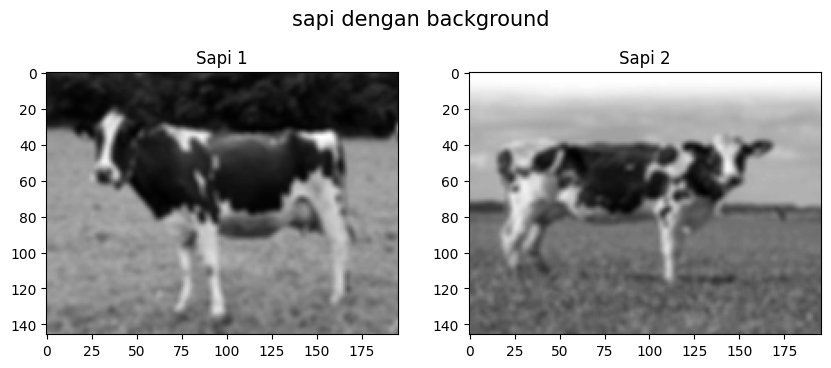

In [29]:
blurred_image4 = gaussian_blur(resized_image4, 5, 1.5)
blurred_image5 = gaussian_blur(resized_image5, 5, 1.5)

display_im2(blurred_image4, blurred_image5, title='sapi dengan background')

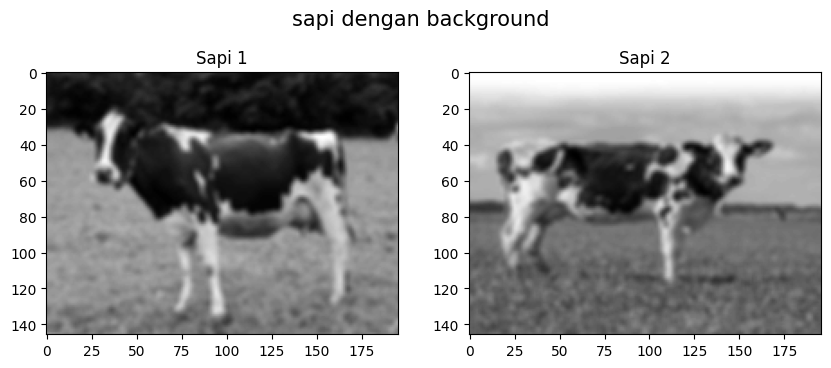

In [30]:
normalized_image4 = normalized(blurred_image4)
normalized_image5 = normalized(blurred_image5)

display_im2(normalized_image4, normalized_image5, title='sapi dengan background')

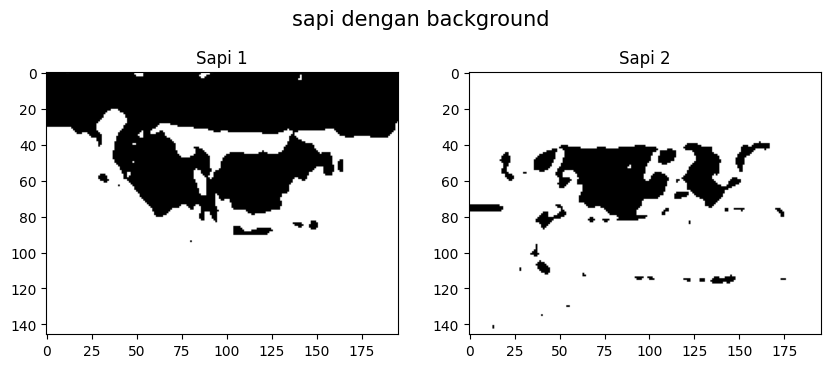

In [40]:
segmented_image4 = segmentation(normalized_image4, 70)
segmented_image5 = segmentation(normalized_image5, 70)

display_im2(segmented_image4, segmented_image5, title='sapi dengan background')

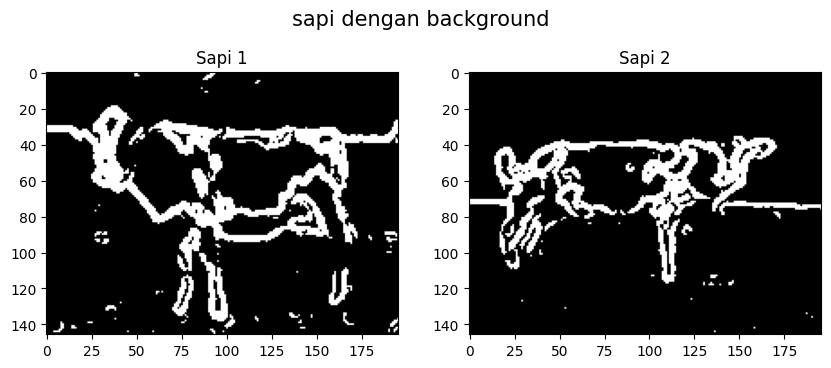

In [32]:
# def graph_cut_segmentation(image, threshold):
#     # Create graph from the image
#     height = len(image)
#     width = len(image[0])
#     graph = [[0] * width for _ in range(height)]

#     # Set the weights of the graph edges
#     for y in range(height):
#         for x in range(width):
#             pixel_value = image[y][x]

#             # Set the weight of the edge connecting adjacent pixels
#             if x > 0:
#                 weight = abs(pixel_value - image[y][x - 1])
#                 graph[y][x] += weight
#                 graph[y][x - 1] += weight
#             if y > 0:
#                 weight = abs(pixel_value - image[y - 1][x])
#                 graph[y][x] += weight
#                 graph[y - 1][x] += weight

#     # Perform graph cut
#     segmented_image = [[0] * width for _ in range(height)]
#     for y in range(height):
#         for x in range(width):
#             if graph[y][x] > threshold:
#                 segmented_image[y][x] = 1  # Object
#             else:
#                 segmented_image[y][x] = 0  # Background

#     return segmented_image

# graph_cut_segmentation1 = graph_cut_segmentation(normalized_image4, 40)
# graph_cut_segmentation2 = graph_cut_segmentation(normalized_image5, 40)
# display_im2(graph_cut_segmentation1, graph_cut_segmentation2, title='sapi dengan background')


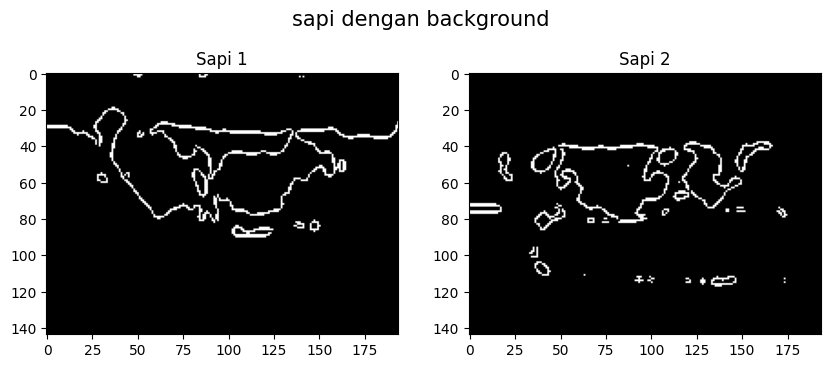

In [41]:
# Perform Sobel filtering for edge detection
def canny_edges_detection(image):
    gradient_x = []
    gradient_y = []
    sobel_threshold = 4 #
    # Adjust the threshold value as needed

    for i in range(1, len(image) - 1):
        gradient_row_x = []
        gradient_row_y = []
        for j in range(1, len(image[i]) - 1):
            gx = (image[i + 1][j - 1] + 2 * image[i + 1][j] + image[i + 1][j + 1]) - \
                (image[i - 1][j - 1] + 2 * image[i - 1][j] + image[i - 1][j + 1])
            gy = (image[i - 1][j + 1] + 2 * image[i][j + 1] + image[i + 1][j + 1]) - \
                (image[i - 1][j - 1] + 2 * image[i][j - 1] + image[i + 1][j - 1])
            gradient_row_x.append(gx)
            gradient_row_y.append(gy)
        gradient_x.append(gradient_row_x)
        gradient_y.append(gradient_row_y)

    # Calculate edge magnitude
    edge_magnitude = []
    for i in range(len(gradient_x)):
        magnitude_row = []
        for j in range(len(gradient_x[i])):
            magnitude = (gradient_x[i][j]**2 + gradient_y[i][j]**2) ** 0.5
            magnitude_row.append(magnitude)
        edge_magnitude.append(magnitude_row)

    # Apply thresholding to extract strong edges
    canny_edges = []
    for i in range(len(edge_magnitude)):
        edges_row = []
        for j in range(len(edge_magnitude[i])):
            if edge_magnitude[i][j] >= sobel_threshold:
                edges_row.append(255)
            else:
                edges_row.append(0)
        canny_edges.append(edges_row)

    return canny_edges

# Display the edges
canny_edges1 = canny_edges_detection(segmented_image4)
canny_edges2 = canny_edges_detection(segmented_image5)

display_im2(canny_edges1, canny_edges2, title='sapi dengan background')